In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [43]:
def read_data(path):
    df = pd.read_csv("winequality_red_original.csv")
    return df

In [44]:
df = read_data("winequality_red_original.csv")

In [45]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
def show_box_plot(attr, df):
    plt.boxplot(df[attr])
    return None

fixed_acidity


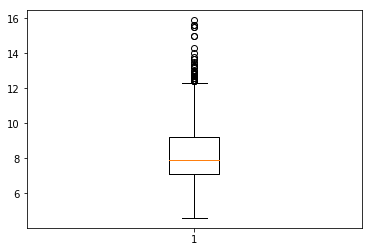

volatile_acidity


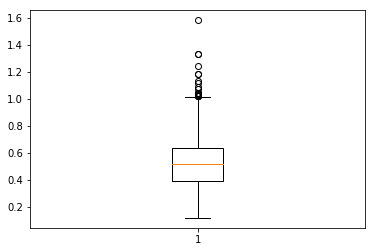

citric_acid


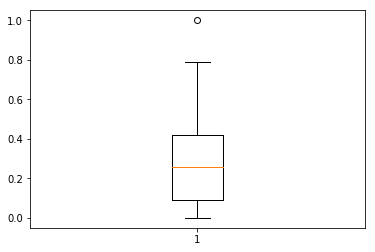

residual_sugar


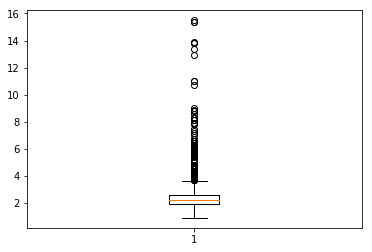

chlorides


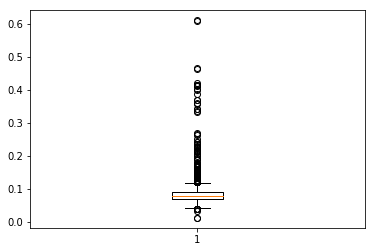

free_sulfur_dioxide


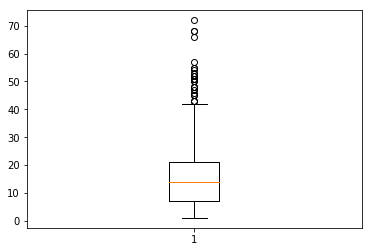

total_sulfur_dioxide


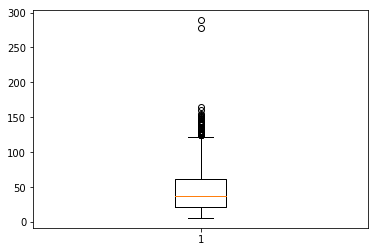

density


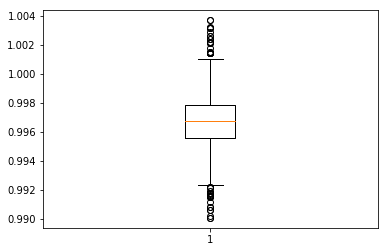

pH


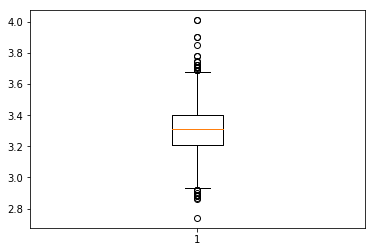

sulphates


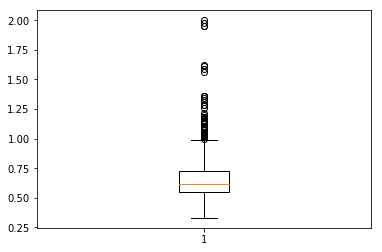

alcohol


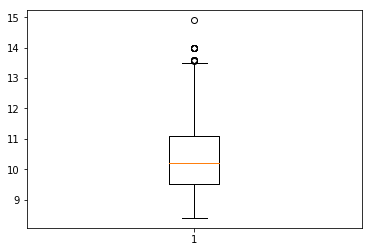

quality


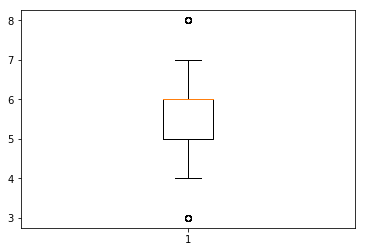

In [47]:
cols = [i for i in df]
for col in cols:
    print(col)
    show_box_plot(col, df)
    plt.show()

In [48]:
def replace_outliers(df):
    cols = [i for i in df]
    for col in cols:
        #print(col)
        q3 = df[col].quantile(0.75)
        #print("q3= ",q3)
        q1 = df[col].quantile(0.25)
        #print("q1= ",q1)
        iqr = q3-q1
        #print("iqr= ",iqr)
        median = df[col].median()
        #print(print("median= ",median,'\n'))
        for i in range(len(df)):
            if df[col][i]>=q3+(1.5*iqr):
                df[col][i] = median
            elif df[col][i]<=q1-(1.5*iqr):
                df[col][i] = median
    return df

In [49]:
pd.options.mode.chained_assignment = None
df = replace_outliers(df)

In [50]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
df2=df
df3=df
df4=df

fixed_acidity


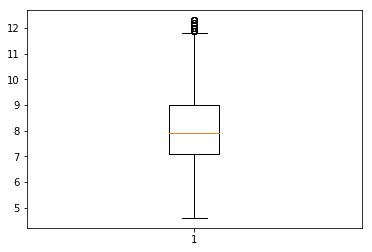

volatile_acidity


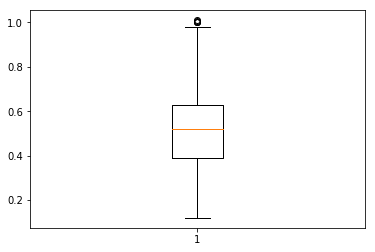

citric_acid


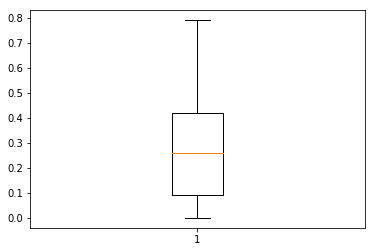

residual_sugar


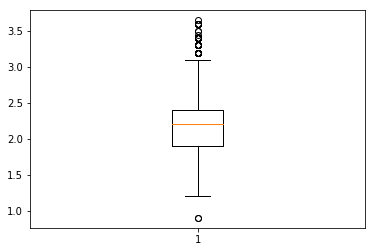

chlorides


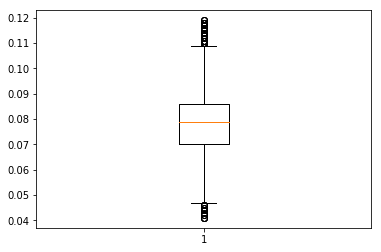

free_sulfur_dioxide


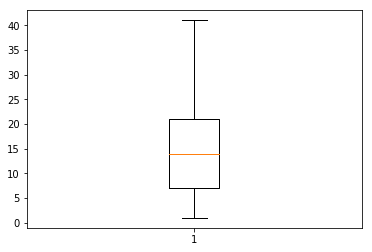

total_sulfur_dioxide


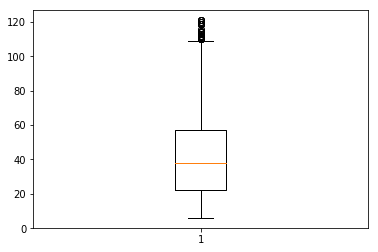

density


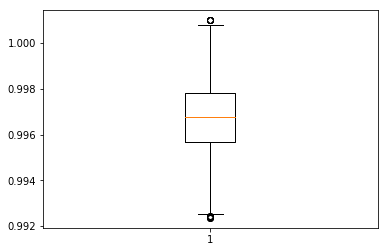

pH


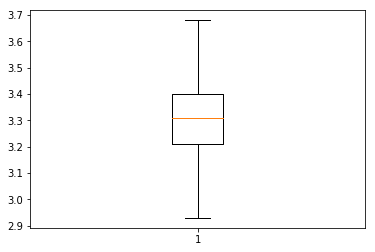

sulphates


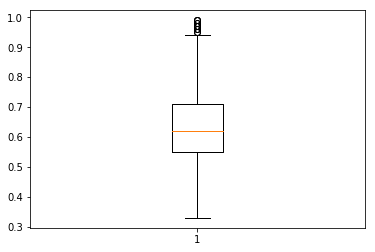

alcohol


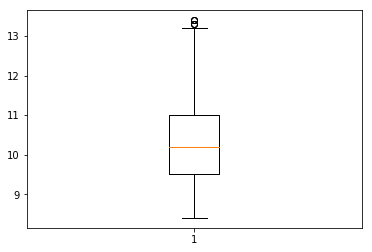

quality


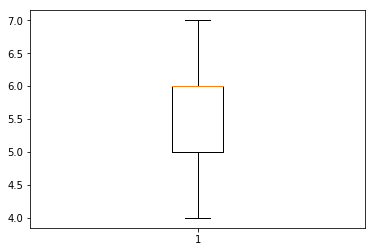

In [52]:
for col in cols:
    print(col)
    show_box_plot(col, df)
    plt.show()

In [53]:
def range1(df, attr):
    mn = df[attr].min()
    mx = df[attr].max()
    return(tuple([mn,mx]))

In [54]:
for col in cols:
    print(col, range1(df, col))

fixed_acidity (4.5999999999999996, 12.300000000000001)
volatile_acidity (0.12, 1.01)
citric_acid (0.0, 0.79000000000000004)
residual_sugar (0.90000000000000002, 3.6499999999999999)
chlorides (0.040999999999999995, 0.11900000000000001)
free_sulfur_dioxide (1.0, 41.0)
total_sulfur_dioxide (6.0, 121.0)
density (0.99234999999999995, 1.0009999999999999)
pH (2.9300000000000002, 3.6800000000000002)
sulphates (0.33000000000000002, 0.98999999999999999)
alcohol (8.4000000000000004, 13.4)
quality (4, 7)


In [55]:
def min_max_normalization(df, rng1, rng0):
    cols = [i for i in df]
    cols = cols[:-1]
    for col in cols:
        mx = df[col].max()
        mn = df[col].min()
        new_mx = rng1
        new_mn = rng0
        for i in range(len(df)):
            nr=(float(df[col][i])-mn)/(mx-mn)
            df[col][i] = (nr*(new_mx-new_mn))+new_mn
    return df

In [56]:
df = min_max_normalization(df, 1,0)

In [57]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.363636,0.651685,0.000000,0.363636,0.448718,0.25,0.243478,0.630058,0.773333,0.348485,0.20,5
1,0.415584,0.853933,0.000000,0.618182,0.730769,0.60,0.530435,0.514451,0.360000,0.530303,0.28,5
2,0.415584,0.719101,0.050633,0.509091,0.653846,0.35,0.417391,0.537572,0.440000,0.484848,0.28,5
3,0.857143,0.179775,0.708861,0.363636,0.435897,0.40,0.469565,0.653179,0.306667,0.378788,0.28,6
4,0.363636,0.651685,0.000000,0.363636,0.448718,0.25,0.243478,0.630058,0.773333,0.348485,0.20,5


In [58]:
df2 = min_max_normalization(df2, 20,0)
df2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.272727,13.033708,0.000000,7.272727,8.974359,5.0,4.869565,12.601156,15.466667,6.969697,4.0,5
1,8.311688,17.078652,0.000000,12.363636,14.615385,12.0,10.608696,10.289017,7.200000,10.606061,5.6,5
2,8.311688,14.382022,1.012658,10.181818,13.076923,7.0,8.347826,10.751445,8.800000,9.696970,5.6,5
3,17.142857,3.595506,14.177215,7.272727,8.717949,8.0,9.391304,13.063584,6.133333,7.575758,5.6,6
4,7.272727,13.033708,0.000000,7.272727,8.974359,5.0,4.869565,12.601156,15.466667,6.969697,4.0,5


In [64]:
def standardize(df):
    cols = [i for i in df]
    cols = cols[:-1]
    for col in cols:
        mean = df[col].mean()
        stdDev = df[col].std()
        print("col=",col,"; mean=",mean,"; stdDev=",stdDev)
        for i in range(len(df)):
            df[col][i] = ((df[col][i])-mean)/stdDev
    return df

In [65]:
df3 = standardize(df3)
df3.head()

col= fixed_acidity ; mean= 9.23255606182 ; stdDev= 3.87242266832
col= volatile_acidity ; mean= 9.00106105642 ; stdDev= 3.7210709136
col= citric_acid ; mean= 6.84842583577 ; stdDev= 4.91000604367
col= residual_sugar ; mean= 9.32219000512 ; stdDev= 3.10432812372
col= chlorides ; mean= 9.68538028576 ; stdDev= 3.67561873577
col= free_sulfur_dioxide ; mean= 7.05565978737 ; stdDev= 4.53335892062
col= total_sulfur_dioxide ; mean= 6.37702912146 ; stdDev= 4.61520179083
col= density ; mean= 10.1387644735 ; stdDev= 3.79901418695
col= pH ; mean= 10.1013133208 ; stdDev= 3.70536604555
col= sulphates ; mean= 9.26696609623 ; stdDev= 3.59847122129
col= alcohol ; mean= 7.96293516781 ; stdDev= 4.05773612669


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-0.506099,1.083733,-1.394790,-0.660195,-0.193443,-0.453452,-0.326630,0.648166,1.447995,-0.638401,-0.976637,5
1,-0.237801,2.170770,-1.394790,0.979744,1.341272,1.090657,0.916897,0.039550,-0.783003,0.372129,-0.582328,5
2,-0.237801,1.446079,-1.188546,0.276913,0.922713,-0.012278,0.427023,0.161274,-0.351197,0.119496,-0.582328,5
3,2.042727,-1.452688,1.492623,-0.660195,-0.263202,0.208309,0.653119,0.769889,-1.070874,-0.469980,-0.582328,6
4,-0.506099,1.083733,-1.394790,-0.660195,-0.193443,-0.453452,-0.326630,0.648166,1.447995,-0.638401,-0.976637,5


In [67]:
cols = [i for i in df3]
cols = cols[:-1]
for col in cols:
    mean = df[col].mean()
    stdDev = df[col].std()
    print("col=",col,"; mean=",mean,"; stdDev=",stdDev)

col= fixed_acidity ; mean= -1.77746775675e-17 ; stdDev= 1.0
col= volatile_acidity ; mean= 8.44297184455e-17 ; stdDev= 1.0
col= citric_acid ; mean= -2.31070808377e-16 ; stdDev= 1.0
col= residual_sugar ; mean= -2.66620163512e-16 ; stdDev= 1.0
col= chlorides ; mean= -2.66620163512e-16 ; stdDev= 1.0
col= free_sulfur_dioxide ; mean= 0.0 ; stdDev= 1.0
col= total_sulfur_dioxide ; mean= 1.77746775675e-17 ; stdDev= 1.0
col= density ; mean= 2.1329613081e-16 ; stdDev= 1.0
col= pH ; mean= 6.22113714862e-17 ; stdDev= 1.0
col= sulphates ; mean= 2.66620163512e-17 ; stdDev= 1.0
col= alcohol ; mean= -3.5549355135e-17 ; stdDev= 1.0
